# Uplift Trees/Forests Visualization

## Introduction
This example notebooks illustrates how to visualize uplift trees for interpretation and diagnosis. 

#### Supported Models
These visualization functions work only for tree-based algorithms:

- Uplift tree/random forests on KL divergence, Euclidean Distance, and Chi-Square
- Uplift tree/random forests on Contextual Treatment Selection

Currently, they are NOT supporting Meta-learner algorithms

- S-learner
- T-learner
- X-learner
- R-learner

#### Supported Usage
This notebook will show how to use visualization for:

- Uplift Tree and Uplift Random Forest
    - Visualize a trained uplift classification tree model
    - Visualize an uplift tree in a trained uplift random forests

- Training and Validation Data
    - Visualize the validation tree: fill the trained uplift classification tree with validation (or testing) data, and show the statistics for both training data and validation data
    
- One Treatment Group and Multiple Treatment Groups
    - Visualize the case where there are one control group and one treatment group
    - Visualize the case where there are one control group and multiple treatment groups



## Step 1 Load Modules

### Load CausalML modules

In [1]:
from causalml.dataset import make_uplift_classification
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

Failed to import duecredit due to No module named 'duecredit'


### Load standard modules

In [2]:
import numpy as np
import pandas as pd
from IPython.display import Image
from sklearn.model_selection import train_test_split

## One Control + One Treatment for Uplift Classification Tree 

In [3]:
# Data generation
df, x_names = make_uplift_classification()

# Rename features for easy interpretation of visualization
x_names_new = ['feature_%s'%(i) for i in range(len(x_names))]
rename_dict = {x_names[i]:x_names_new[i] for i in range(len(x_names))}
df = df.rename(columns=rename_dict)
x_names = x_names_new

df.head()

df = df[df['treatment_group_key'].isin(['control','treatment1'])]

# Look at the conversion rate and sample size in each group
df.pivot_table(values='conversion',
               index='treatment_group_key',
               aggfunc=[np.mean, np.size],
               margins=True)

,mean,size
,conversion,conversion
treatment_group_key,,
control,0.5110,1000
treatment1,0.5140,1000
All,0.5125,2000


In [4]:
df

,treatment_group_key,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,conversion,treatment_effect
0,control,-0.542888,1.976361,-0.531359,-2.354211,-0.380629,-2.614321,-0.128893,0.448689,-2.275192,...,-1.315304,0.742654,1.891699,-2.428395,1.541875,-0.817705,-0.610194,-0.591581,0,0
2,treatment1,1.697012,-2.762600,-0.662874,-1.682340,1.217443,0.837982,1.042981,0.177398,-0.112409,...,-1.132497,1.050179,1.573054,-1.788427,1.341609,-0.749227,-2.091521,-0.471386,0,0
4,control,-0.625074,3.002388,-0.096288,1.938235,3.392424,-0.465860,-0.919897,-1.072592,-1.331181,...,-1.403984,0.760430,1.917635,-2.347675,1.560946,-0.833067,-1.407884,-0.781343,0,0
7,control,-0.827410,1.117353,0.164807,-3.345787,-1.900252,-0.584397,0.440497,-0.096122,0.430637,...,-0.327216,0.441284,1.420889,-1.055613,1.146517,-0.928806,-0.958600,-0.980386,0,0
8,control,-0.041742,-1.001671,-0.480375,-0.197259,0.318476,0.793769,-0.297321,-0.710540,0.498514,...,-0.239901,0.773623,1.276985,-1.288250,1.049823,-1.050412,-1.306712,-0.841102,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,control,1.605705,-0.057968,0.732660,0.694999,-0.156983,-0.929401,-0.411017,-0.670816,1.831366,...,-2.573776,0.141312,-1.107178,2.618402,-0.866792,-0.789233,1.594381,-1.070945,0,0
3991,control,-0.638594,0.768827,-0.206538,-1.046880,0.647093,-0.791303,1.336393,-1.250701,0.808292,...,1.334124,0.947657,-0.178951,0.791609,-0.164951,-0.932706,1.346403,-0.835163,0,0
3993,control,0.197333,-0.418667,-0.522879,1.481359,1.962056,-0.860636,1.166344,0.309422,2.125216,...,0.381320,0.662861,1.049222,-1.142208,0.868987,-0.985319,-0.633448,-0.759969,1,0
3994,treatment1,2.132019,-1.398166,0.572348,1.360757,0.598790,0.126641,1.909191,-1.751503,-0.642226,...,-1.666912,0.044554,1.303199,-0.972901,1.131552,-0.594160,-1.971587,-0.814583,1,0


In [5]:
# Split data to training and testing samples for model validation (next section)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=111)

# Train uplift tree
uplift_model = UpliftTreeClassifier(max_depth = 4, min_samples_leaf = 200, min_samples_treatment = 50, n_reg = 100, evaluationFunction='KL', control_name='control')

uplift_model.fit(df_train[x_names].values,
                 treatment=df_train['treatment_group_key'].values,
                 y=df_train['conversion'].values)

In [6]:
# Print uplift tree as a string
result = uplift_tree_string(uplift_model.fitted_uplift_tree, x_names)

feature_17 >= -0.44234212654232735?
yes -> feature_10 >= 1.020659213325515?
		yes -> [0.3813559322033898, 0.6065573770491803]
		no  -> [0.5078125, 0.5267857142857143]
no  -> feature_9 >= 0.8142773340486676?
		yes -> [0.4596774193548387, 0.61]
		no  -> feature_4 >= 0.280545459525536?
				yes -> [0.5522875816993464, 0.4143302180685358]
				no  -> [0.5070422535211268, 0.5748031496062992]


#### Read the tree
- First line: node split condition
- impurity: the value for the loss function
- total_sample: total sample size in this node
- group_sample: sample size by treatment group
- uplift score: the treatment effect between treatment and control (when there are multiple treatment groups, this is the maximum of the treatment effects)
- uplift p_value: the p_value for the treatment effect
- validation uplift score: when validation data is filled in the tree, this reflects the uplift score based on the - validation data. It can be compared with the uplift score (for training data) to check if there are over-fitting issue.

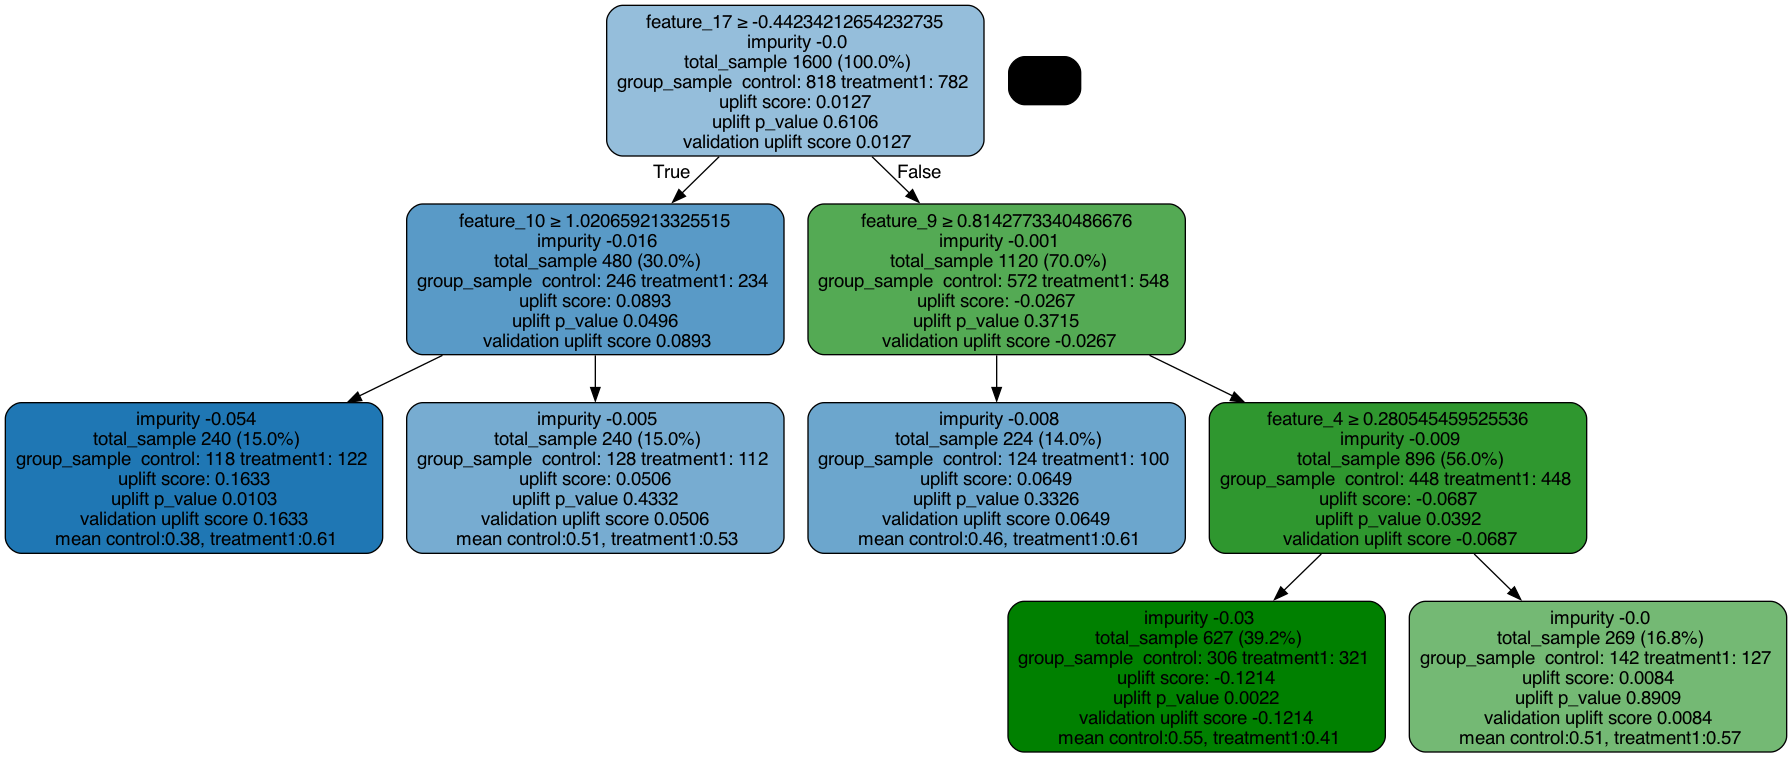

In [7]:
# Plot uplift tree
graph = uplift_tree_plot(uplift_model.fitted_uplift_tree,x_names)
Image(graph.create_png())

### Visualize Validation Tree: One Control + One Treatment for Uplift Classification Tree
Note the validation uplift score will update.

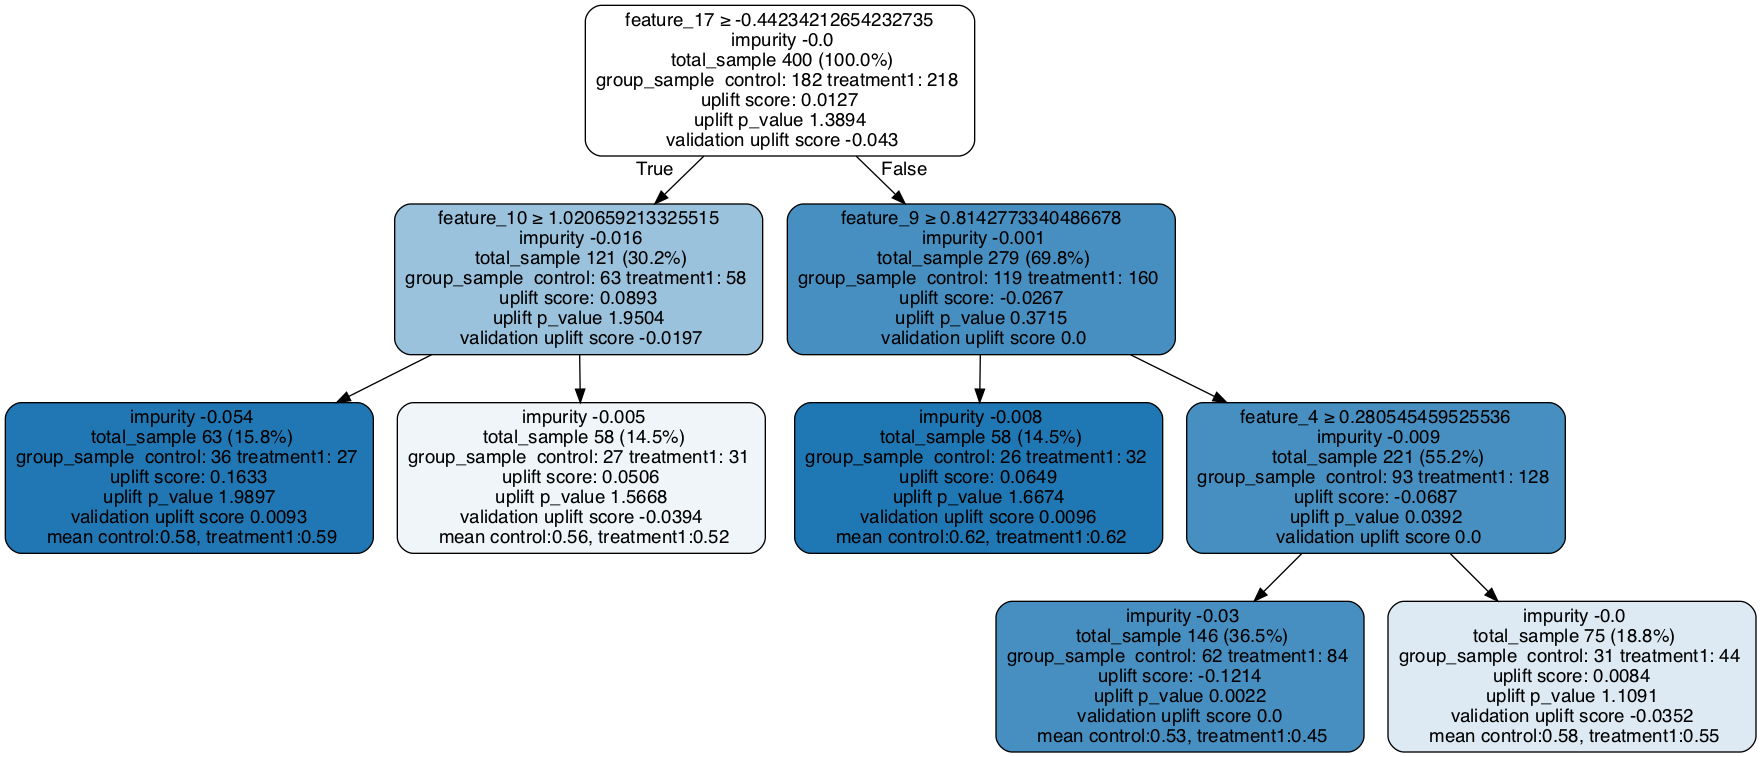

In [7]:
### Fill the trained tree with testing data set 
# The uplift score based on testing dataset is shown as validation uplift score in the tree nodes
uplift_model.fill(X=df_test[x_names].values, treatment=df_test['treatment_group_key'].values, y=df_test['conversion'].values)

# Plot uplift tree
graph = uplift_tree_plot(uplift_model.fitted_uplift_tree,x_names)
Image(graph.create_png())

### Visualize a Tree in Random Forest

In [8]:
# Split data to training and testing samples for model validation (next section)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=111)

# Train uplift tree
uplift_model = UpliftRandomForestClassifier(n_estimators=5, max_depth = 5, min_samples_leaf = 200, min_samples_treatment = 50, n_reg = 100, evaluationFunction='KL', control_name='control')

uplift_model.fit(df_train[x_names].values,
                 treatment=df_train['treatment_group_key'].values,
                 y=df_train['conversion'].values)

In [9]:
# Specify a tree in the random forest (the index can be any integer from 0 to n_estimators-1)
uplift_tree = uplift_model.uplift_forest[0]
# Print uplift tree as a string
result = uplift_tree_string(uplift_tree.fitted_uplift_tree, x_names)

feature_0 >= -0.44907381030867755?
yes -> feature_6 >= -0.0583060585067711?
		yes -> feature_9 >= 0.03401322870693866?
				yes -> [0.4774193548387097, 0.5396825396825397]
				no  -> [0.34615384615384615, 0.6129032258064516]
		no  -> feature_12 >= 0.4863045964698285?
				yes -> [0.48299319727891155, 0.5714285714285714]
				no  -> [0.582089552238806, 0.4452054794520548]
no  -> feature_10 >= 1.0043523431178796?
		yes -> [0.4807692307692308, 0.35766423357664234]
		no  -> [0.5229357798165137, 0.5426356589147286]


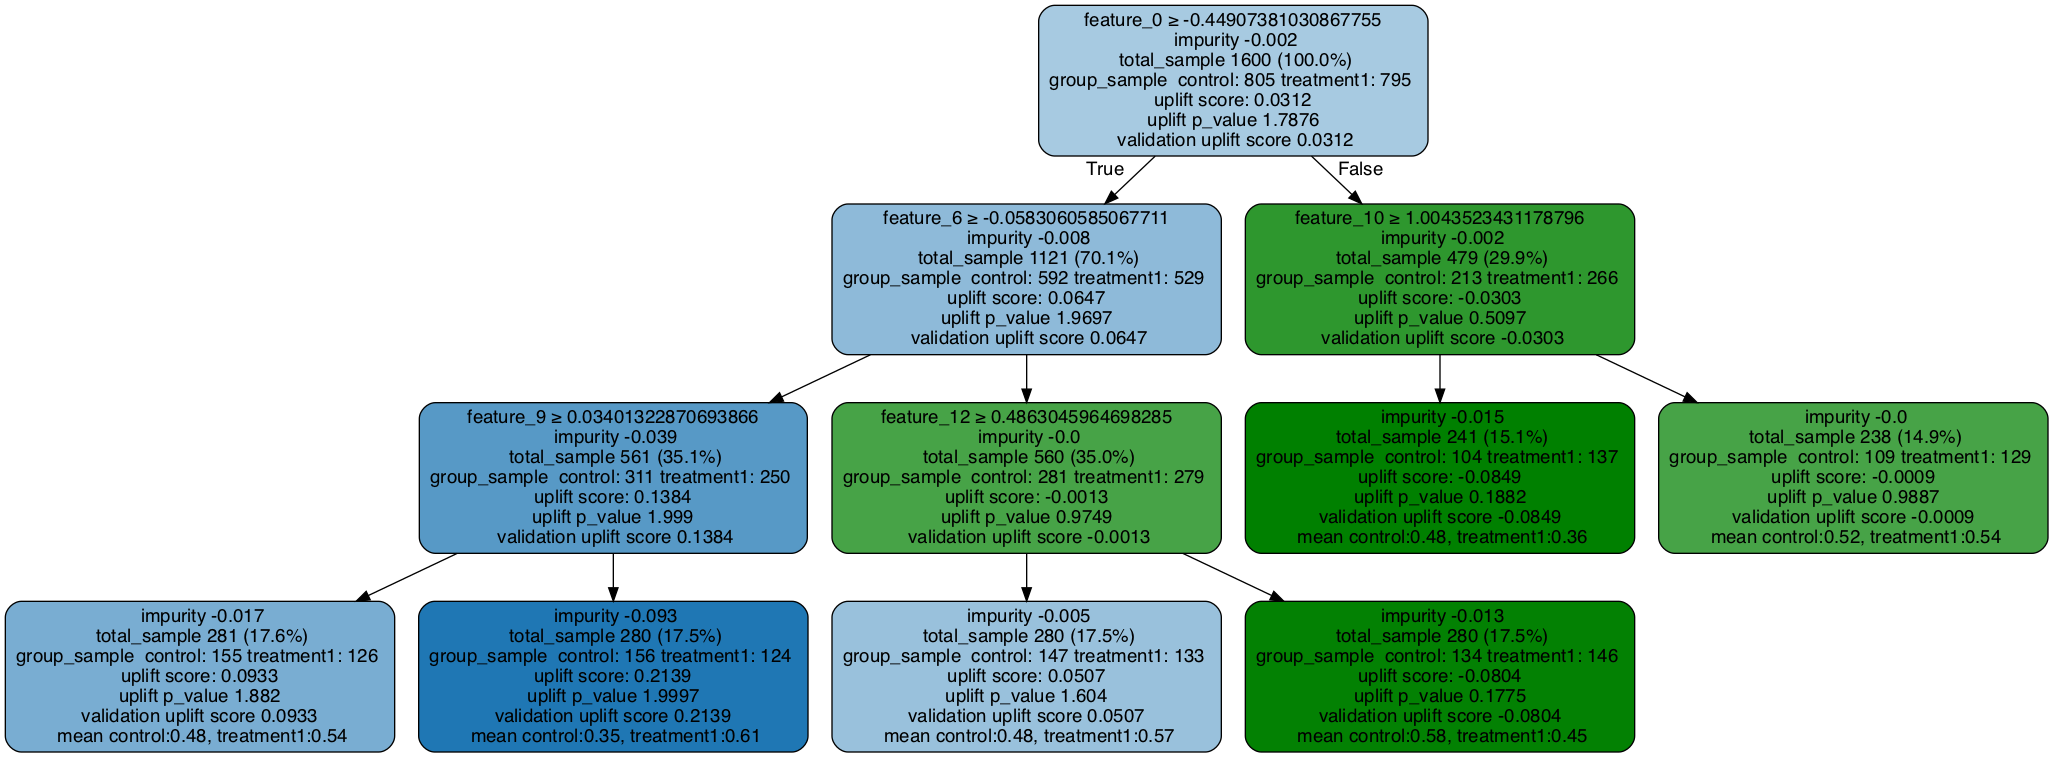

In [10]:
# Plot uplift tree
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree,x_names)
Image(graph.create_png())

#### Fill the tree with validation data

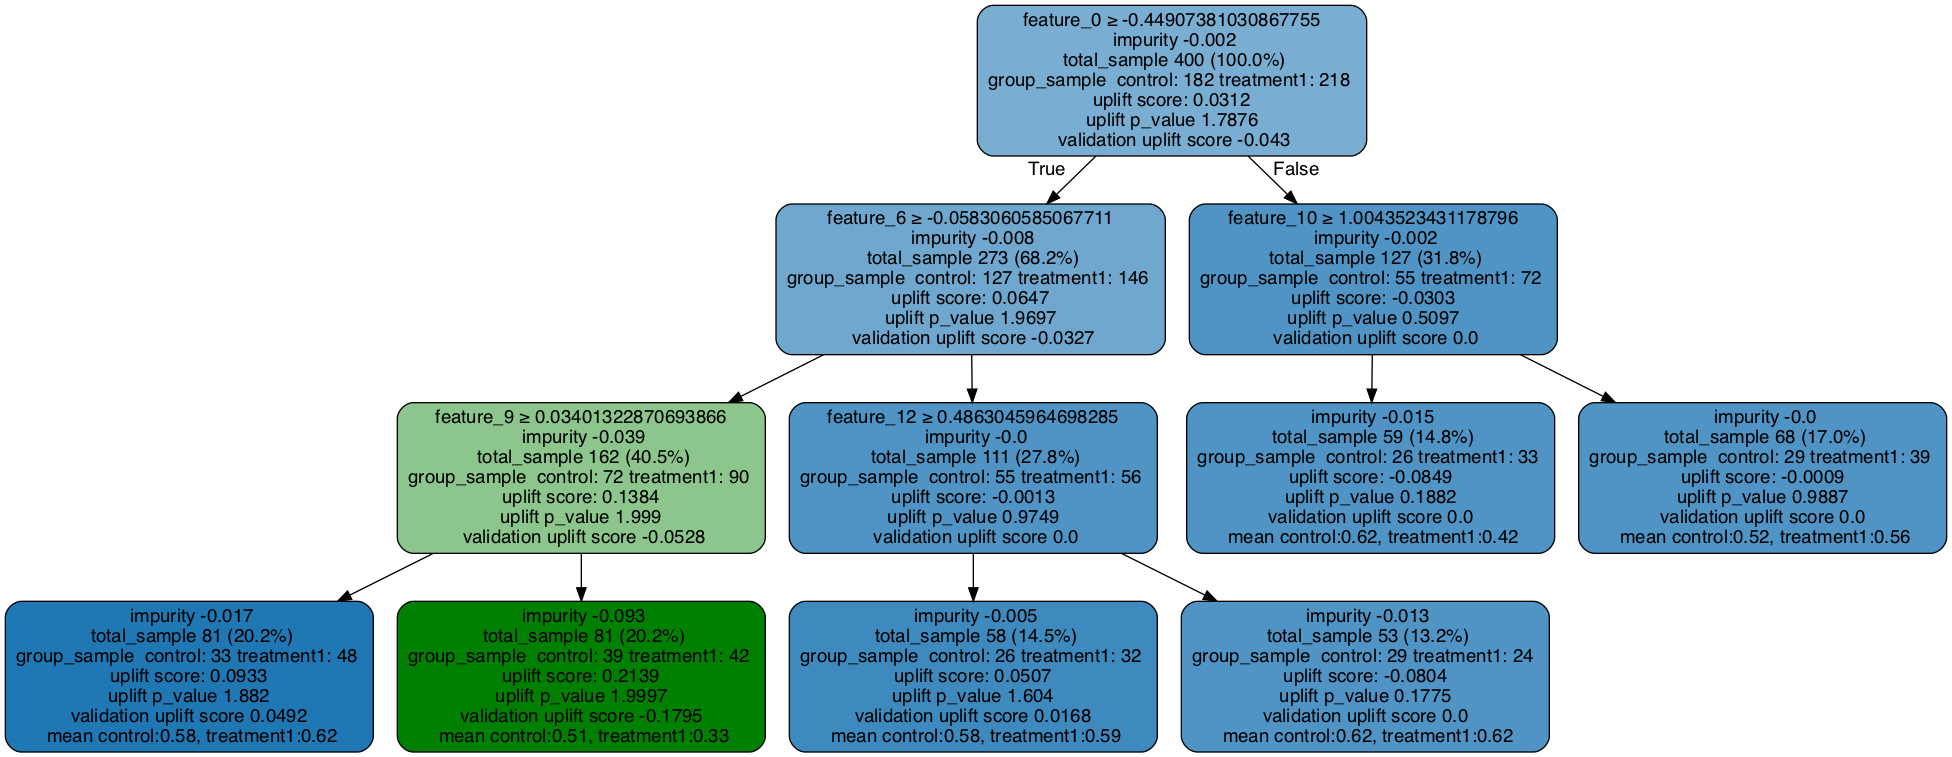

In [11]:
### Fill the trained tree with testing data set 
# The uplift score based on testing dataset is shown as validation uplift score in the tree nodes
uplift_tree.fill(X=df_test[x_names].values, treatment=df_test['treatment_group_key'].values, y=df_test['conversion'].values)

# Plot uplift tree
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree,x_names)
Image(graph.create_png())

## One Control + Multiple Treatments

In [12]:
# Data generation
df, x_names = make_uplift_classification()
# Look at the conversion rate and sample size in each group
df.pivot_table(values='conversion',
               index='treatment_group_key',
               aggfunc=[np.mean, np.size],
               margins=True)

,mean,size
,conversion,conversion
treatment_group_key,,
control,0.511,1000
treatment1,0.514,1000
treatment2,0.559,1000
treatment3,0.600,1000
All,0.546,4000


In [13]:
# Split data to training and testing samples for model validation (next section)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=111)

# Train uplift tree
uplift_model = UpliftTreeClassifier(max_depth = 3, min_samples_leaf = 200, min_samples_treatment = 50, n_reg = 100, evaluationFunction='KL', control_name='control')

uplift_model.fit(df_train[x_names].values,
                 treatment=df_train['treatment_group_key'].values,
                 y=df_train['conversion'].values)

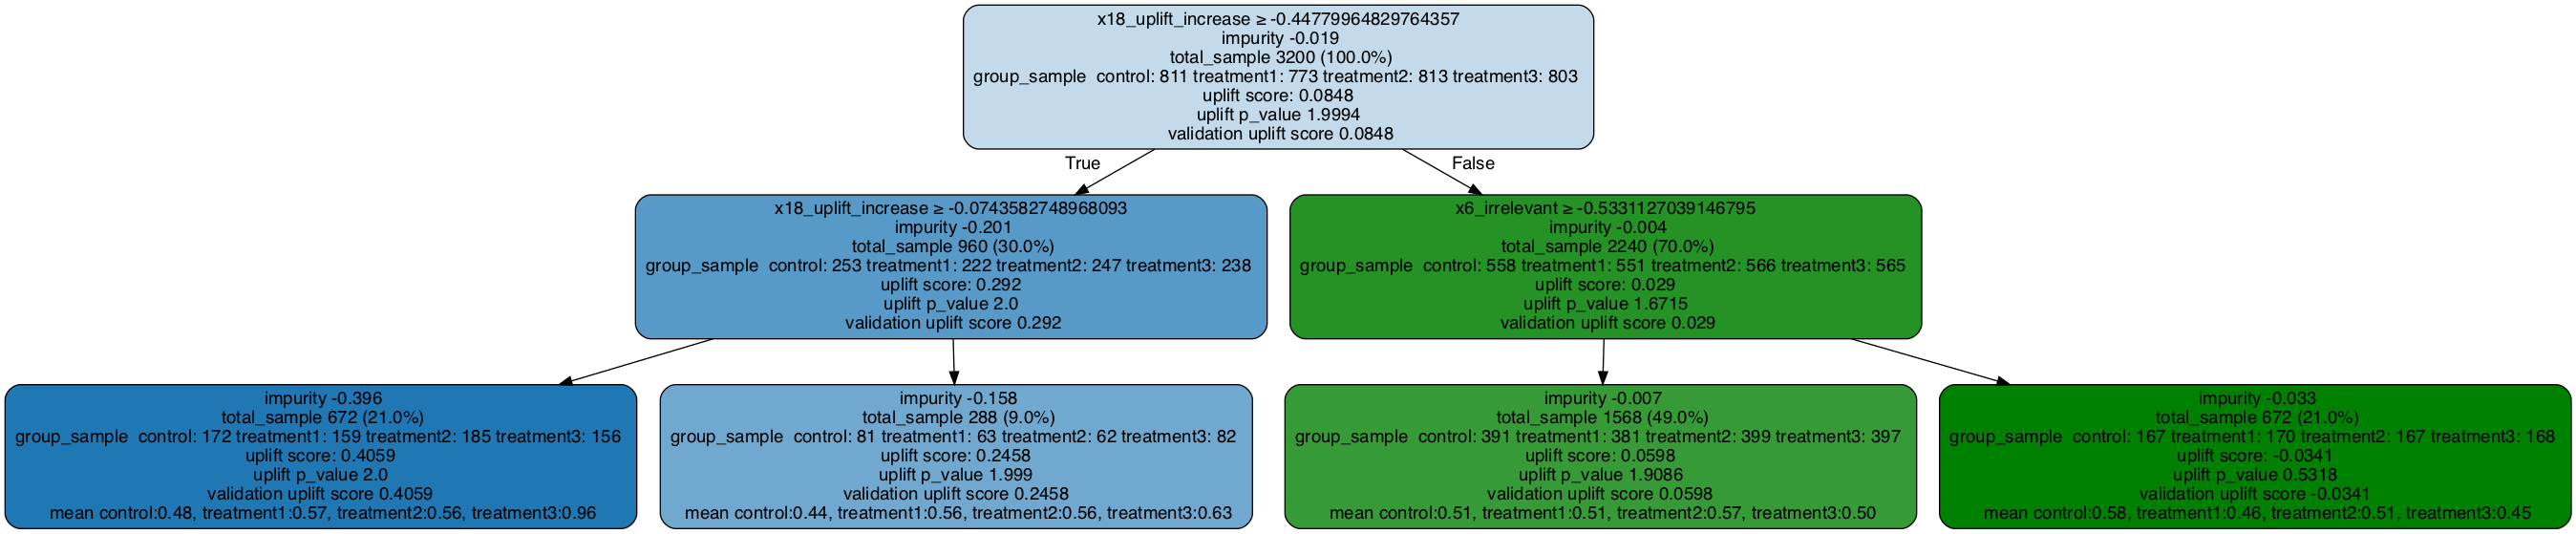

In [14]:
# Plot uplift tree
# The uplift score represents the best uplift score among all treatment effects
graph = uplift_tree_plot(uplift_model.fitted_uplift_tree,x_names)
Image(graph.create_png())

### Save the Plot

In [15]:
# Save the graph as pdf
graph.write_pdf("tbc.pdf")
# Save the graph as png
graph.write_png("tbc.png")

True